In [ ]:
# Instalando bibliotecas

!pip install seaborn
!pip install openpyxl

In [ ]:
# Importando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Carregando os dados

arquivo = 'desempenho_jogadores.xlsx'
df = pd.read_excel(arquivo)

# Exibir os dados

print('Dados carregados:')
print(df)

Dados carregados:
              Jogador           Time  Gols  Partidas
0            Paulinho    Atlético-MG    20        36
1     Tiquinho Soares       Botafogo    17        33
2         Luis Suárez         Grêmio    17        33
3                Hulk    Atlético-MG    15        34
4     Marcos Leonardo         Santos    13        31
5               Pedro       Flamengo    13        34
6              Robson       Coritiba    12        32
7           Deyverson         Cuiabá    12        36
8         Vitor Roque   Athlético-PR    12        25
9   Gonzalo Mastriani     América-MG    11        24
10      Eduardo Sasha  RB Bragantino    11        33
11            Endrick      Palmeiras    11        31
12      Pablo Vegetti          Vasco    10        21
13        Germán Cano     Fluminense    10        30


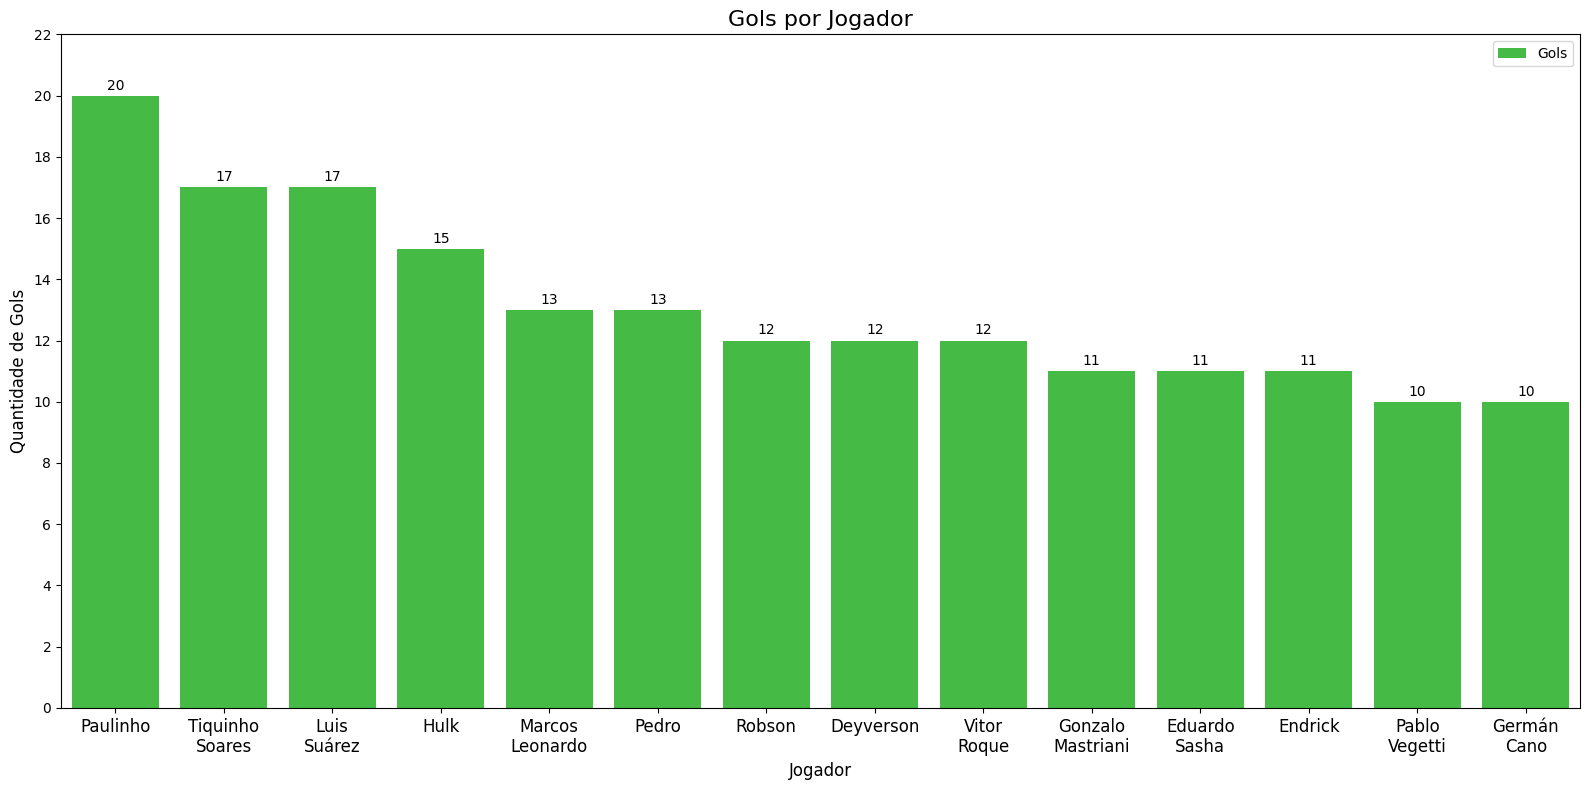

In [ ]:
# Substituir espaço por quebra de linha para empilhar os nomes dos jogadores
df['Jogador'] = df['Jogador'].str.replace(' ', '\n')

# Gráfico de Gols por jogador
plt.figure(figsize=(16, 8))
sns.barplot(x='Jogador', y='Gols', data=df, color='limegreen', label='Gols')

# Adicionar rótulos de dados
for index, row in df.iterrows():
    plt.text(
        x=index, y=row['Gols'] + 0.1,  # Posição do rótulo: mais próximo da barra
        s=f"{row['Gols']}", ha='center', va='bottom', fontsize=10, color='black'
    )

# Configurações do gráfico
plt.title('Gols por Jogador', fontsize=16)
plt.xlabel('Jogador', fontsize=12)
plt.ylabel('Quantidade de Gols', fontsize=12)

# Configurar o intervalo do eixo y para subir de 2 em 2
max_y = df['Gols'].max() + 2  # Definir o máximo do eixo y baseado no maior valor de gols
plt.yticks(np.arange(0, max_y + 1, 2))  # Criar ticks de 0 ao máximo, subindo de 2 em 2

plt.xticks(rotation=0, ha='center', fontsize=12)  # Sem rotação e centralizado para nomes empilhados
plt.tight_layout()
plt.show()

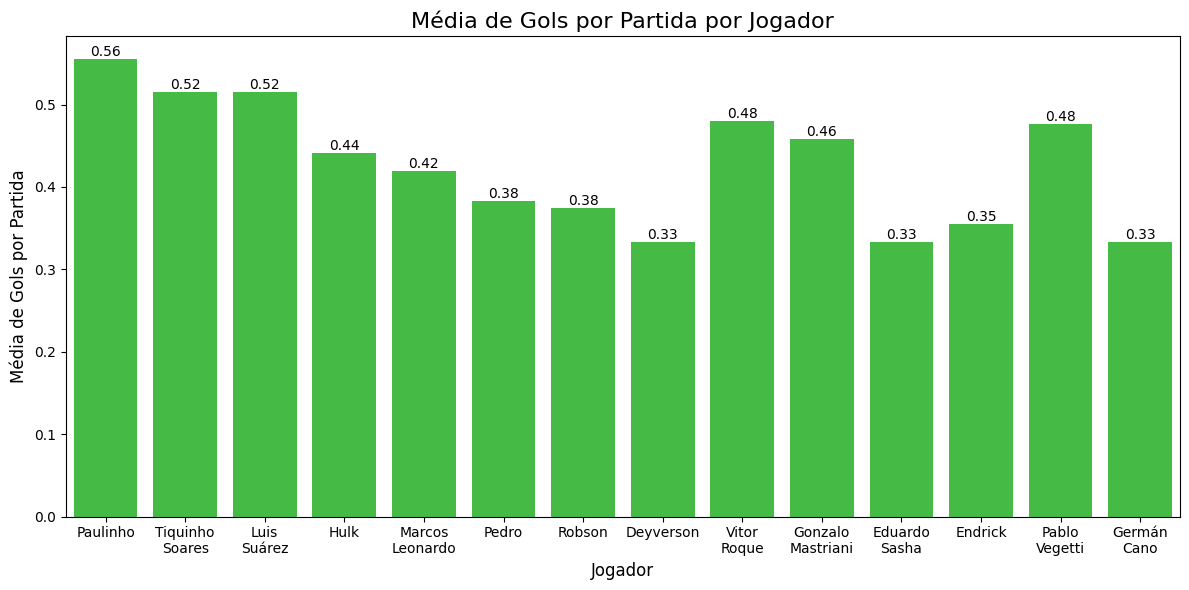

In [7]:
# Adicionar a coluna de média de gols por partida
df['Média de Gols por Partida'] = df['Gols'] / df['Partidas']

# Substituir o espaço por uma quebra de linha para empilhar os nomes
df['Jogador'] = df['Jogador'].str.replace(' ', '\n')

# Criar o gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='Jogador', y='Média de Gols por Partida', data=df,
    color='limegreen', errorbar=None  # Substituindo 'ci' por 'errorbar=None'
)

# Adicionar rótulos de dados no topo de cada barra
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}',  # Formatar com 2 casas decimais
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Posição do texto
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Configurar o gráfico
plt.title('Média de Gols por Partida por Jogador', fontsize=16)
plt.xlabel('Jogador', fontsize=12)
plt.ylabel('Média de Gols por Partida', fontsize=12)

# Centralizar e ajustar os rótulos dos jogadores no eixo x
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.tight_layout()
plt.show()


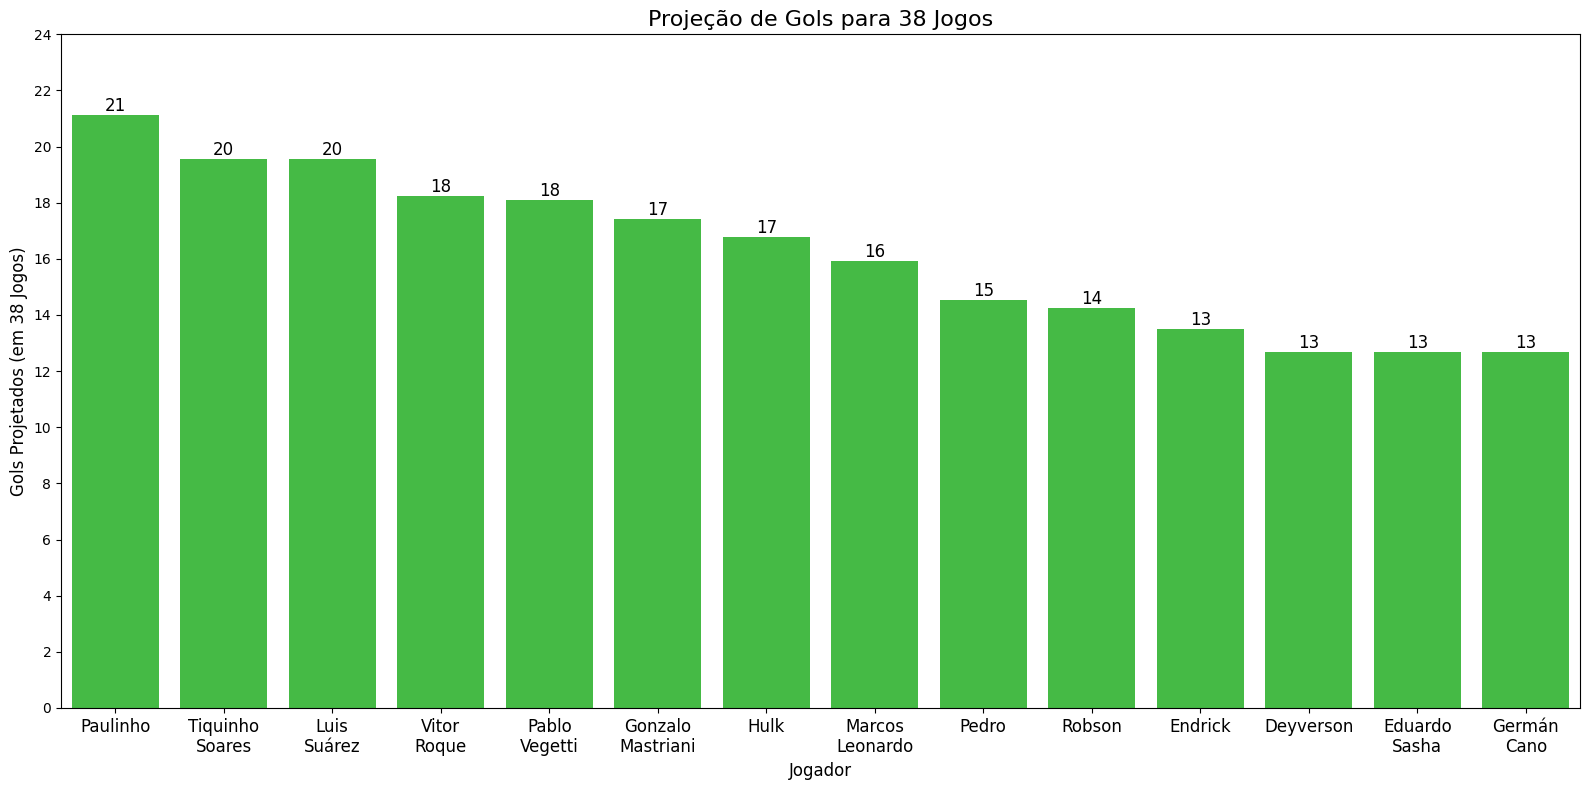

In [ ]:
# Calcular a projeção de gols para 38 jogos (considerando o total de gols por jogador)
df['Gols_Projeção_38_Jogos'] = (df['Gols'] / df['Partidas']) * 38  # Gols por jogo * 38 jogos

# Ordenar o DataFrame pela projeção de gols em ordem decrescente
df_sorted = df.sort_values(by='Gols_Projeção_38_Jogos', ascending=False)

# Substituir o espaço por uma quebra de linha para empilhar os nomes
df_sorted['Jogador'] = df_sorted['Jogador'].str.replace(' ', '\n')

# Gráfico de Gols Projetados para 38 jogos
plt.figure(figsize=(16, 8))
sns.barplot(x='Jogador', y='Gols_Projeção_38_Jogos', data=df_sorted, color='limegreen')

# Adicionar rótulos de dados arredondados
for bar in plt.gca().patches:
    # Arredondar o valor para o número inteiro mais próximo
    rounded_value = round(bar.get_height())
    plt.gca().annotate(rounded_value,  # Exibe o valor arredondado
                       (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Posição
                       ha='center', va='bottom', fontsize=12, color='black')  # Estilo do rótulo

# Configurações do gráfico
plt.title('Projeção de Gols para 38 Jogos', fontsize=16)
plt.xlabel('Jogador', fontsize=12)
plt.ylabel('Gols Projetados (em 38 Jogos)', fontsize=12)

# Configurar o intervalo do eixo y para subir de 2 em 2
max_y = df_sorted['Gols_Projeção_38_Jogos'].max() + 2  # Determinar o máximo do eixo y
plt.yticks(np.arange(0, max_y + 1, 2))  # Criar ticks de 0 ao máximo, subindo de 2 em 2

plt.xticks(rotation=0, ha='center', fontsize=12)  # Remover a rotação para melhor exibição
plt.tight_layout()
plt.show()